## Contents
1. Imprting libraries.
2. Reading data, setting up.
3. Create a regional segmentation of the data (Q.3).
4. Create an exclusion flag for low-activity customers (Q.4).
5. Create a profiling variable based on: (Q.5 and Q.6).
    - Age
    - Income
    - The dependents
    - Order timing
     (containing visualizing profile distributions at the end of each varibale).
     
7. Descriptive statistics on customer profile level (Q.7).
8. Visualizing regional profile differences and department preferences(Q.8 and Q.9).
9. Export charts.
10. Export data.

__1. Imprting libraries__

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

__2. Reading data, setting up__

In [3]:
path= r'C:\Users\hp\Desktop\Task 4\Task 4.2\Instacart Basket Analysis'

In [4]:
customer_orders_products_combined = pd.read_pickle(r'C:\Users\hp\Desktop\Task 4\Task 4.2\Instacart Basket Analysis\02 Data\Prepared Data\customer_orders_products_combined.pkl')

In [5]:
customer_orders_products_combined.shape

(32404859, 33)

In [6]:
customer_orders_products_combined.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'exists', 'price_range', 'Busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_freq', 'order_freq', 'Gender',
       'State', 'Age', 'Date_Joined', 'Dependants_Number', 'Family_Status',
       'Income'],
      dtype='object')

__3.__ __Q.3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).__

In [7]:
states = customer_orders_products_combined['State'].tolist()

In [8]:
print(customer_orders_products_combined['State'])

0             Alabama
1             Alabama
2             Alabama
3             Alabama
4             Alabama
              ...    
32404854       Hawaii
32404855    Tennessee
32404856    Tennessee
32404857    Tennessee
32404858    Tennessee
Name: State, Length: 32404859, dtype: object


In [9]:
##Group states by regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [10]:
region_flags = []
for row in states:
    if row in northeast:
        region_flags.append('Northeast')
    elif row in midwest:
        region_flags.append('Midwest')
    elif row in south:
        region_flags.append('South')
    elif row in west:
        region_flags.append('West')
    else:
        print('Error: Cannot recognize state')

In [11]:
region_flags

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
customer_orders_products_combined['region_flags']= region_flags

In [13]:
print(customer_orders_products_combined['region_flags'])

0           South
1           South
2           South
3           South
4           South
            ...  
32404854     West
32404855    South
32404856    South
32404857    South
32404858    South
Name: region_flags, Length: 32404859, dtype: object


In [14]:
customer_orders_products_combined['region_flags'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region_flags, dtype: int64

In [15]:
regional_spending_crosstab = pd.crosstab(customer_orders_products_combined['region_flags'], customer_orders_products_combined['spending_flag'], dropna = False)

In [16]:
regional_spending_crosstab.describe()

spending_flag,High spender,Low spender
count,4.000000,4.000000
mean,1339.250000,50213.000000
std,359.438799,12847.282929
min,915.000000,35138.000000
25%,1180.500000,44343.500000
50%,1327.500000,49741.000000
75%,1486.250000,55610.500000
max,1787.000000,66232.000000


__4.__ __Q.4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.__

In [17]:
## Create low-activity customers
customer_orders_products_combined.loc[customer_orders_products_combined['max_order'] < 5, 'activity_flag'] = 'low activity'
customer_orders_products_combined.loc[customer_orders_products_combined['max_order'] >= 5, 'activity_flag'] = 'high activity'

In [18]:
customer_orders_products_combined.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_freq,Gender,State,Age,Date_Joined,Dependants_Number,Family_Status,Income,region_flags,activity_flag
0,2539329,1,prior,1,2,8,1.0,196,1,0,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer.,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity


__5.__ __Q.5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)__

__- Age__

In [21]:
customer_orders_products_combined['Age'].min()

18

In [22]:
customer_orders_products_combined['Age'].max()

81

In [213]:
# Create age flag
age_flag = []
for row in customer_orders_products_combined['Age']:
    if row <=25 :
        age_flag.append('Young')
    elif row >25 and row <=60:
        age_flag.append('Adult')
    elif row >60:
        age_flag.append('Old')
    else:
        print('Error: Cannot recognize Age')

In [24]:
customer_orders_products_combined['age_flag']=age_flag

In [25]:
age_flag

['Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Adult',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 '

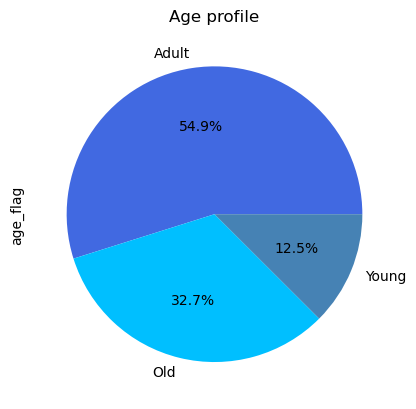

In [216]:
## Create pie chart
colors = ['powderblue', 'skyblue', 'lightblue']
pie_1= customer_orders_products_combined['age_flag'].value_counts().plot.pie(title= 'Age profile', 
                                                                            autopct='%1.1f%%',
                                                                             colors = ['royalblue', 'deepskyblue', 'steelblue'])

__- Income flag__

In [26]:
customer_orders_products_combined['Income'].min()

25903

In [27]:
customer_orders_products_combined['Income'].max()

593901

In [28]:
customer_orders_products_combined['Income'].mean()

99437.73329450376

In [214]:
## Create income flag
income_flag = []
for row in customer_orders_products_combined['Income'].tolist():
    if row <50000 :
        income_flag.append('Low_income')
    elif row >50000 and row <=100000:
        income_flag.append('Normal_income')
    elif row >100000:
        income_flag.append('High_income')
    else:
        print('Error: Cannot recognize income')

In [30]:
income_flag

['Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Low_income',
 'Normal_income',
 'Normal_income',
 'Normal_income',
 'Normal_income',
 'Normal_income',
 'Normal_income',
 'Norma

In [31]:
customer_orders_products_combined['income_flag']=income_flag

In [64]:
income_cross= pd.crosstab(customer_orders_products_combined['income_flag'], customer_orders_products_combined['Income'], dropna = False)

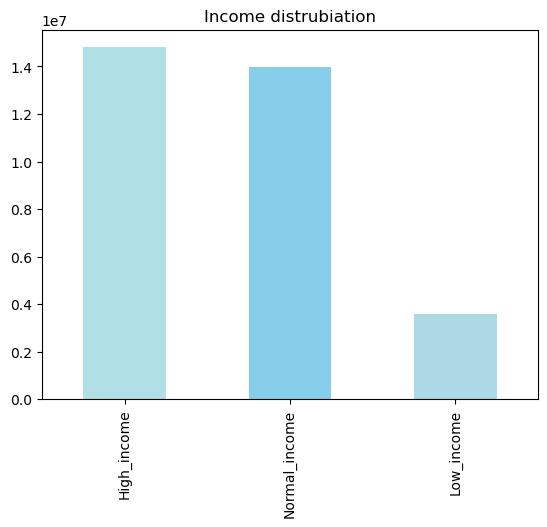

In [215]:
##Create bar chart
bar_1=customer_orders_products_combined['income_flag'].value_counts().plot.bar(title= 'Income distrubiation', color = ['powderblue', 'skyblue', 'lightblue'],)

__- Number of dependents__

In [35]:
customer_orders_products_combined['Dependants_Number'].min()

0

In [36]:
customer_orders_products_combined['Dependants_Number'].max()

3

In [219]:
## Create dependents flag
number_of_dependents_flag = []
for row in customer_orders_products_combined['Dependants_Number'].tolist():
    if row <=0:
        number_of_dependents_flag.append('Single')
    elif row >=1:
        number_of_dependents_flag.append('Parent')
    else:
        print('Error: Cannot recognize dependents number')

TypeError: '<=' not supported between instances of 'str' and 'int'

In [38]:
number_of_dependents_flag

['Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',

In [46]:
customer_orders_products_combined['number_of_dependents_flag']=number_of_dependents_flag

In [47]:
customer_orders_products_combined['number_of_dependents_flag'].value_counts()

Parent    24307356
Single     8097503
Name: number_of_dependents_flag, dtype: int64

In [53]:
depandent_cross= pd.crosstab(customer_orders_products_combined['Dependants_Number'], customer_orders_products_combined['count_number_of_dependents_flag'], dropna = False)

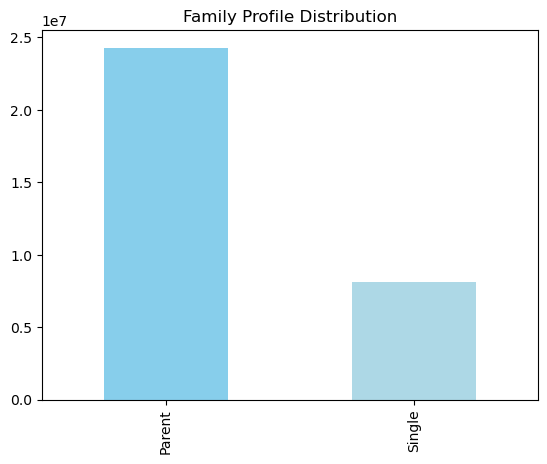

In [185]:
##Create bar chart
bar_2=customer_orders_products_combined['number_of_dependents_flag'].value_counts().plot(kind = 'bar', title = 'Family Profile Distribution', color= ['skyblue', 'lightblue'],)

__- Days of orders__

In [115]:
## Create days of order flag
days_of_orders_flag = []
for row in customer_orders_products_combined['order_day_of_week'].tolist():
    if row ==0 or row == 1 :
        days_of_orders_flag.append('weekend_customer')
    if row ==2 or row == 3 or row ==4 or row == 5 or row ==6 or row == 7:
        days_of_orders_flag.append('weekday_customer')

In [114]:
customer_orders_products_combined['order_day_of_week']

0           2
1           3
2           3
3           4
4           4
           ..
32404854    4
32404855    6
32404856    1
32404857    6
32404858    1
Name: order_day_of_week, Length: 32404859, dtype: int64

In [116]:
days_of_orders_flag

['weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekend_customer',
 'weekend_customer',
 'weekend_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekend_customer',
 'weekend_customer',
 'weekend_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekend_customer',
 'weekend_customer',
 'weekend_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekend_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekday_customer',
 'weekend_customer',
 'weekend_customer',
 'weekend_customer',
 'weekday_customer',
 'weekday_cus

In [117]:
customer_orders_products_combined['days_of_orders_flag']=days_of_orders_flag

In [118]:
len(days_of_orders_flag)

32404859

In [111]:
len(customer_orders_products_combined)

32404859

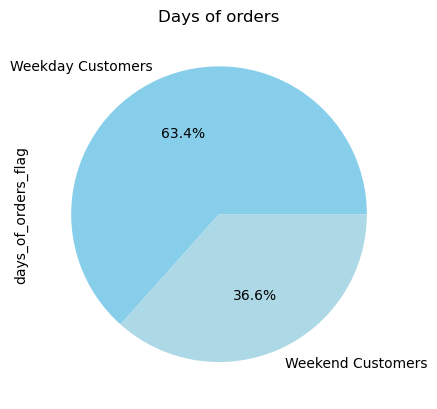

In [198]:
##Create pie chart
pie_2=customer_orders_products_combined['days_of_orders_flag'].value_counts().plot(kind = 'pie',
                                                                             title = 'Days of orders',
                                                                             colors= ['skyblue', 'lightblue'], 
                                                                             labels=['Weekday Customers', 'Weekend Customers'],
                                                                            autopct='%1.1f%%')

__6.__ __Q.7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure__

__Age__

In [134]:
customer_orders_products_combined.groupby('age_flag').agg({'Age': ['mean', 'min', 'max']})

Age        
               mean min max
age_flag                   
Adult     42.977069  26  60
Old       71.063583  61  81
Young     21.473543  18  25

In [135]:
customer_orders_products_combined.groupby('age_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
               mean  min      max
age_flag                         
Adult     12.015830  1.0  99999.0
Old       11.845923  1.0  99999.0
Young     12.175118  1.0  99999.0

__Income__

In [139]:
customer_orders_products_combined.groupby('income_flag').agg({'order_id': ['mean', 'min', 'max']})

order_id             
                       mean min      max
income_flag                             
High_income    1.710741e+06   3  3421082
Low_income     1.710017e+06   7  3421078
Normal_income  1.710938e+06   2  3421083

__Days of orders__

In [221]:
customer_orders_products_combined.groupby('days_of_orders_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                          mean  min      max
days_of_orders_flag                         
weekday_customer     12.170441  1.0  99999.0
weekend_customer     11.650913  1.0  99999.0

__Number_of_dependents__

In [222]:
customer_orders_products_combined.groupby('number_of_dependents_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                                mean  min      max
number_of_dependents_flag                         
Parent                     11.930584  1.0  99999.0
Single                     12.129243  1.0  99999.0

__7.__ __Q.8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.__

In [ ]:
regional_spending_crosstab = pd.crosstab(customer_orders_products_combined['region_flags'], customer_orders_products_combined['spending_flag'], dropna = False)

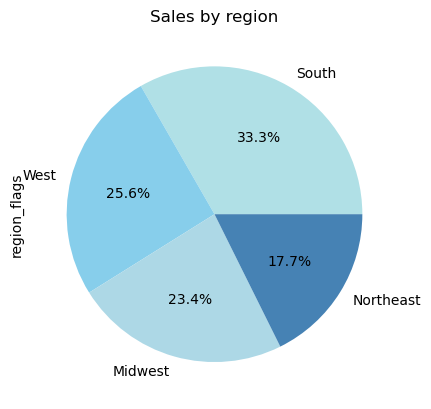

In [195]:
##Create pie chart
pie_3=customer_orders_products_combined['region_flags'].value_counts().plot(kind = 'pie',
                                                                             title = 'Sales by region',
                                                                            colors = ['powderblue', 'skyblue', 'lightblue','steelblue'],
                                                                            autopct='%1.1f%%')

In [148]:
customer_orders_products_combined['department_id'].describe()

count    3.240486e+07
mean     9.919792e+00
std      6.281485e+00
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.600000e+01
max      2.100000e+01
Name: department_id, dtype: float64

In [163]:
regional_departmemt_crosstab = pd.crosstab(customer_orders_products_combined['region_flags'], customer_orders_products_combined['product_id'], dropna = False)

In [164]:
regional_departmemt_crosstab

product_id,1,2,3,4,5,6,7,8,9,10,...,49679,49680,49681,49682,49683,49684,49685,49686,49687,49688
region_flags,,,,,,,,,,,,,,,,,,,,,
Midwest,412,27,72,74,11,0,11,25,28,705,...,27,256,9,26,22940,3,7,15,6,22
Northeast,309,13,66,47,1,0,7,23,25,438,...,33,149,11,24,16625,2,9,34,1,9
South,655,28,72,123,1,7,9,92,71,841,...,40,332,28,33,32477,3,19,19,6,35
West,476,22,67,85,2,1,3,25,32,588,...,32,281,22,25,25273,1,14,52,0,23


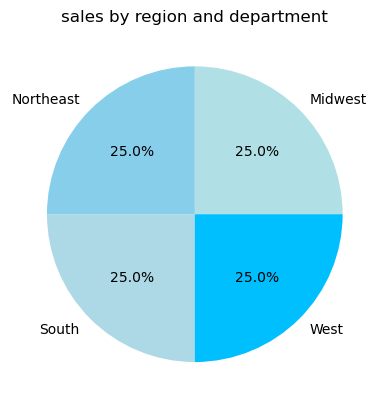

In [202]:
##Create pie chart
pie_4=regional_departmemt_crosstab.value_counts().plot(kind = 'pie',
                                                                             title = 'sales by region and department',
                                                autopct='%1.1f%%',
                                                labels= ['Midwest','Northeast','South','West'],
                                               colors = ['powderblue', 'skyblue', 'lightblue', 'deepskyblue'] )

__8.__ __Export charts__

In [183]:
pie_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_profile.png'))

In [184]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_distrubiation.png'))

In [196]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_Profile_Distribution.png'))

In [199]:
pie_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Days_of_orders.png'))

In [200]:
pie_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_by_region.png'))

In [204]:
pie_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_by_region_and_department.png'))

__9.__ __Export data__

In [205]:
customer_orders_products_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_combined_final.pkl'))